Dumping a whole lot of stuff I wrote here for now

Welcome to our blog on using GMMA (Guppy Multiple Moving Average) trading techniques in Python. In this blog, we will explore the various applications of GMMA in the world of algorithmic trading. We will delve into the details of how GMMA is used to analyze market trends and make predictions about future market movements. We will also discuss how to implement GMMA in Python, using popular libraries such as Pandas, NumPy, and Matplotlib. Whether you're a seasoned trader or a beginner looking to get started with algorithmic trading, this blog will provide valuable insights and practical examples to help you understand and utilize GMMA in your trading strategies.


Backtesting is the process of testing a trading strategy using historical data. It involves simulating the execution of a strategy using historical market data, and evaluating its performance based on metrics such as profit, return, and risk. Backtesting allows traders to evaluate the effectiveness of a strategy and identify potential issues before implementing it in live trading. It also helps traders to optimize their strategies by adjusting parameters and fine-tuning their approach. Backtesting is a crucial step in the development of any trading strategy, as it allows traders to identify and address any weaknesses before committing real capital.


Guppy Multiple Moving Average (GMMA) trading is a technical analysis method that aims to identify the current trend of a financial market and predict future market movements. The GMMA indicator is composed of multiple moving averages of different lengths, which are used to identify different aspects of market behavior. These moving averages are grouped into two categories: short-term and long-term. The short-term moving averages are used to identify short-term market trends and changes in momentum, while the long-term moving averages are used to identify long-term market trends and the overall direction of the market.

The GMMA indicator is believed to be more accurate than a single moving average in identifying market trends, as it takes into account both short-term and long-term market movements. Traders use GMMA to identify potential buy and sell signals based on the relationship between the short-term and long-term moving averages. For example, when the short-term moving averages are above the long-term moving averages, it is considered a bullish signal, indicating that the market is in an uptrend. Conversely, when the short-term moving averages are below the long-term moving averages, it is considered a bearish signal, indicating that the market is in a downtrend.


# GMMA Trading

Guppy Multiple Moving Average (GMMA) trading is a technical analysis method that aims to identify the current trend of a financial market and predict future market movements. 

## The GMMA Indicator

The GMMA indicator is composed of multiple moving averages of different lengths, which are used to identify different aspects of market behavior. These moving averages are grouped into two categories: short-term and long-term. 

### Short-term moving averages

- The short-term moving averages are used to identify short-term market trends and changes in momentum

### Long-term moving averages

- The long-term moving averages are used to identify long-term market trends and the overall direction of the market.

## Market Trends Identification

The GMMA indicator is believed to be more accurate than a single moving average in identifying market trends, as it takes into account both short-term and long-term market movements. Traders use GMMA to identify potential buy and sell signals based on the relationship between the short-term and long-term moving averages. 

- When the short-term moving averages are above the long-term moving averages, it is considered a bullish signal, indicating that the market is in an uptrend.
- Conversely, when the short-term moving averages are below the long-term moving averages, it is considered a bearish signal, indicating that the market is in a downtrend.
- n GMMA (Guppy Multiple Moving Average) trading, the magnitude of the difference between the short-term and long-term moving averages can indicate the strength of the current trend. A larger difference between the two moving averages suggests a stronger trend, while a smaller difference suggests a weaker trend. Additionally, a crossover of the short-term moving average crossing above the long-term moving average can indicate a potential trend reversal to the upside, while a crossover of the short-term moving average crossing below the long-term moving average can indicate a potential trend reversal to the downside.

Going over how to back-test the red-white-blue strategy for leveraged ETFs

We will be using exponential moving averages. We will then check on every date to determine if we are in a red-white-blue pattern or a blue-white-red pattern. Based on that, the program will simulate entering and exiting the positions and determine the profitability of the strategy.

https://www.investopedia.com/terms/g/guppy-multiple-moving-average.asp

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()

In [74]:
start_year = 2020
start_month = 1
start_day = 1
start = dt.datetime(start_year, start_month, start_day)
end = dt.datetime.now()

stock = 'NVDA'

data = pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [75]:
'''Calculating the exponential moving averages'''

# short_term < 20 < long_term
ema_timeframes = [3, 5, 8, 10, 12, 15, 30, 35, 40, 45, 50, 60]

for time in ema_timeframes:
    # Looking at column 4, "Close"
    ema_string = f"ema_{time}"
    data[ema_string] = round(data.iloc[:, 4].ewm(span=time, adjust=False).mean(), 2)

In [76]:
position_exists = 0 # Bool. Tracks if we are holding a position.
num = 0 # Keeps track of the row we are on
percent_change = [] # Holds trading results


for i in data.index:
    short_ema_min = min(data['ema_3'][i], data['ema_5'][i], data['ema_8'][i], data['ema_10'][i],
                       data['ema_12'][i], data['ema_15'][i])
    long_ema_max = max(data['ema_30'][i], data['ema_35'][i], data['ema_40'][i], data['ema_45'][i],
                       data['ema_50'][i], data['ema_60'][i])
    
    close_price = data['Adj Close'][i]
    
    if short_ema_min > long_ema_max: # RED-WHITE-BLUE
        if position_exists == 0:
            buy_price = close_price
            print(f"Buying at {buy_price}")
            position_exists = 1
            
    elif short_ema_min < long_ema_max: # BLUE-WHITE-RED
        if position_exists == 1:
            selling_price = close_price
            print(f"Selling at {selling_price}")
            position_exists = 0
            
            change = 100*((selling_price/buy_price)-1)
            percent_change.append(change)
    
    if num == len(data) and position_exists == 1:
        selling_price = close_price
        print("Selling at {selling_price}")
        position_exists = 0
    
    num += 1

Buying at 60.8692512512207
Selling at 58.9035530090332
Buying at 62.473690032958984
Selling at 62.969749450683594
Buying at 67.32479858398438
Selling at 61.18485641479492
Buying at 66.54700469970703
Selling at 126.00472259521484
Buying at 141.30252075195312
Selling at 130.60256958007812
Buying at 135.16046142578125
Selling at 129.07395935058594
Buying at 134.60398864746094
Selling at 128.36276245117188
Buying at 138.424560546875
Selling at 128.94422912597656
Buying at 135.3226776123047
Selling at 132.83465576171875
Buying at 141.22828674316406
Selling at 144.3737030029297
Buying at 147.90603637695312
Selling at 142.4490203857422
Buying at 155.89183044433594
Selling at 187.56597900390625
Buying at 193.8607635498047
Selling at 190.16529846191406
Buying at 197.7359619140625
Selling at 212.23553466796875
Buying at 219.17820739746094
Selling at 206.77130126953125
Buying at 221.98521423339844
Selling at 281.3468933105469
Buying at 309.1609191894531
Selling at 275.78216552734375
Buying at 276

In [77]:
print(percent_change)

[-3.229378055062049, 0.794029322524259, -9.119881972658527, 89.34694831692337, -7.572371048254711, -4.503167576516088, -4.636731986178622, -6.848735067999801, -1.8385845554387048, 2.2271857375752546, -3.689515401050425, 20.31802979623114, -1.9062470508330764, 7.3327950128807995, -5.660647687217746, 26.741276117036648, -10.79656308100667, -11.862642454663153, -10.021593934337968, -5.873904700681109, -6.027291306257288]


In [78]:
gains = 0
num_gains = 0
losses = 0
num_losses = 0
total_return = 1

for pct in percent_change:
    if pct > 0:
        gains += pct
        num_gains += 1
    else:
        losses += pct
        num_losses += 1
        
    total_return = total_return * ((pct/100) + 1)

total_return = round((total_return-1)*100, 2)

In [79]:
if num_gains > 0:
    average_gain = gains/num_gains
    max_return = str(max(percent_change))

if num_losses > 0:
    average_loss = losses/num_losses
    max_loss = str(min(percent_change))

In [80]:
print('Average Gain: ', average_gain)
print('Average Loss: ', average_loss)

print('Max Gain: ', max_return)
print('Max Loss: ', max_loss)

print(f"Total return over {len(percent_change)} trades: {total_return}%")

Average Gain:  24.46004405052858
Average Loss:  -6.239150391877062
Max Gain:  89.34694831692337
Max Loss:  -11.862642454663153
Total return over 21 trades: 20.55%


In [81]:
import matplotlib.pyplot as plt

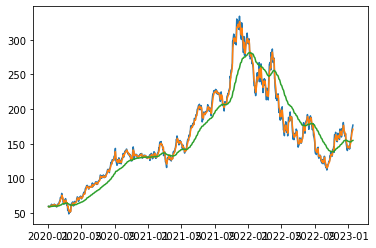

In [84]:
plt.plot(data['Close'])
plt.plot(data['ema_3'])
plt.plot(data['ema_60'])